<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales_data_with_stores.csv',
 'ecommerce-data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ab_experiment.csv',
 'match_result_test.csv',
 '1_orders_dataset.csv',
 'lead_conversion.csv',
 'sample-sales-data.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'groceries.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'cookie_cats.csv',
 'app_wau.csv',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'sales.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [3]:
df = pd.read_csv('sales_data_with_stores.csv')
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales
0,Violet,PG2,4187,498,420.76,569.91,13,58
1,Rose,PG2,4195,473,545.64,712.41,16,58
2,Violet,PG2,4204,968,640.42,854.91,22,88
3,Daisy,PG2,4219,241,869.69,1034.55,14,45
4,Daisy,PG2,4718,1401,12.54,26.59,50,285


In [4]:
df.isnull().sum()

store               0
product_group       0
product_code        0
stock_qty           0
cost                0
price               0
last_week_sales     0
last_month_sales    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store             1000 non-null   object 
 1   product_group     1000 non-null   object 
 2   product_code      1000 non-null   int64  
 3   stock_qty         1000 non-null   int64  
 4   cost              1000 non-null   float64
 5   price             1000 non-null   float64
 6   last_week_sales   1000 non-null   int64  
 7   last_month_sales  1000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [18]:
df[['product_code','cost','price']].drop_duplicates()

,product_code,cost,price
0,4187,420.76,569.91
1,4195,545.64,712.41
2,4204,640.42,854.91
3,4219,869.69,1034.55
4,4718,12.54,26.59
...,...,...,...
995,8048,11.99,11.39
996,8050,1.32,3.32
997,952,37.71,61.74
998,1307,31.44,42.74


In [19]:
df2 = df[['stock_qty',	'cost',	'price','last_week_sales','last_month_sales']].assign(diff = df['price'] - df['cost'])
df2.head()

,stock_qty,cost,price,last_week_sales,last_month_sales,diff
0,498,420.76,569.91,13,58,149.15
1,473,545.64,712.41,16,58,166.77
2,968,640.42,854.91,22,88,214.49
3,241,869.69,1034.55,14,45,164.86
4,1401,12.54,26.59,50,285,14.05


<Axes: >

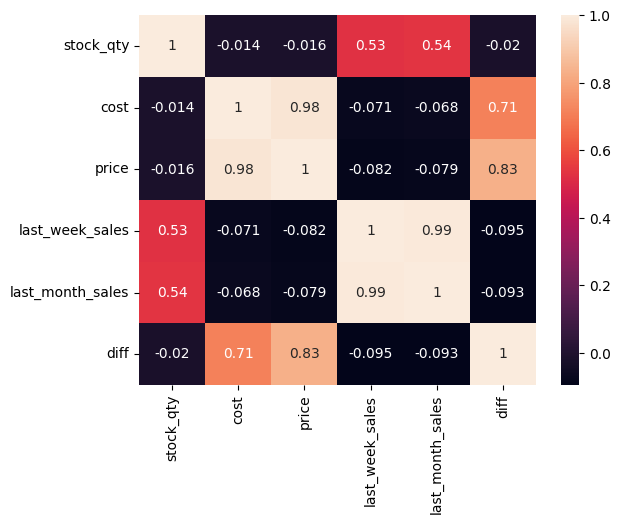

In [20]:
sns.heatmap(df2.corr(), annot = True)

# Iterators

In [21]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [22]:
{k: eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [23]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}